In [15]:
import pandas as pd
import numpy as np

from data_processing import cart_to_polar
from ground_truth_shadow import get_area, get_distance
from validation_data_processing import plot_data

In [8]:
# load and process markerless with rig
markerlessrig_data_raw = pd.read_csv("./Data/sub180.csv")
markerlessrig_data_raw['x (ft)'] = markerlessrig_data_raw.x * 3.28084
markerlessrig_data_raw['y (ft)'] = markerlessrig_data_raw.y * 3.28084

In [9]:
markerlessrig_nvp = markerlessrig_data_raw[(abs(markerlessrig_data_raw["x (ft)"]) <= 40) & (abs(markerlessrig_data_raw["y (ft)"]) <= 20)][["x (ft)", "y (ft)"]].to_numpy() - np.array([[1.8542, -7.5208]])
markerlessrig_nvp = markerlessrig_nvp[~((markerlessrig_nvp[:, 0] > 13.5) & (markerlessrig_nvp[:, 0] < 15.7) & (markerlessrig_nvp[:, 1] > 9.5) & (markerlessrig_nvp[:, 1] < 13.4))]
markerlessrig_nvp = np.concatenate((markerlessrig_nvp, cart_to_polar(markerlessrig_nvp)), axis=1)
markerlessrig_nvp = markerlessrig_nvp[markerlessrig_nvp[:, 3].argsort()[::-1]]

In [13]:
dataset = markerlessrig_nvp
eye_point = np.array([[0, 0]])

num_nvp_points = np.shape(dataset)[0]
nvp_area = 0
for i in range(num_nvp_points - 1):
    # print(dataset[i])
    left_dist = get_distance(eye_point[0], dataset[i])
    right_dist = get_distance(eye_point[0], dataset[i+1])
    between_dist = get_distance(dataset[i], dataset[i+1])

    triangle_area = get_area(left_dist, right_dist, between_dist)

    nvp_area += triangle_area

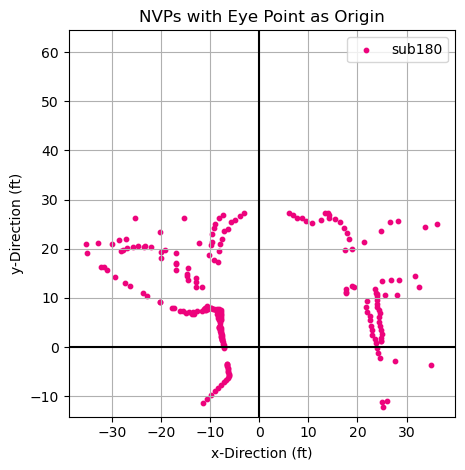

In [16]:
plot_data([dataset], ['sub180'])